In [30]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import decision tree
from sklearn.tree import DecisionTreeClassifier
from dtreeviz import dtreeviz
from sklearn.tree import export_text


In [10]:
df = pd.read_csv(r"C:\Users\Rein\Documents\AIyear3\Thesis\HPO\diabetes\MLP\diabetes_MD_MLP_discretized.csv", header=0, sep=';')
# df['params_class_weight'] = df['params_class_weight'].fillna('None')

X = df.drop(columns=['value'])
X_encoded = pd.get_dummies(X, drop_first=True)

y = df['value']


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#Decision Tree
def objective(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int("max_depth", 1, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Train Decision Tree
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    
    # Evaluate model accuracy
    accuracy = model.score(X_test, y_test)

    return accuracy

In [12]:
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=150)  

best_params = study.best_params
print("Best parameters:", best_params)

[I 2025-06-12 15:06:45,700] A new study created in memory with name: no-name-64908e21-e5f3-46e1-8bbd-04ae26693865
[I 2025-06-12 15:06:45,728] Trial 0 finished with value: 0.6464646464646465 and parameters: {'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6464646464646465.
[I 2025-06-12 15:06:45,743] Trial 1 finished with value: 0.6313131313131313 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6464646464646465.
[I 2025-06-12 15:06:45,762] Trial 2 finished with value: 0.6565656565656566 and parameters: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6565656565656566.
[I 2025-06-12 15:06:45,777] Trial 3 finished with value: 0.6616161616161617 and parameters: {'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.6616161616161617.
[I 2025-06-12 15:06:45,793] Trial 4 finished with value: 0.6616

Best parameters: {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2}


In [14]:
# Train the best model on full training data
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model:", accuracy)
#print the feature importance
importances = best_model.feature_importances_
feature_names = X_encoded.columns
indices = importances.argsort()[::-1]
print("feature importances:")
for f in range(X_encoded.shape[1]):
    print(f"{feature_names[indices[f]]} {importances[indices[f]]}")
labels = ['Low', 'Medium', 'High']

Accuracy of the best model: 0.6818181818181818
feature importances:
solver_sgd 0.24176596131190004
scaled 0.17565672262703635
solver_lbfgs 0.1740062937372011
learning_rate_invscaling 0.1723793820893019
activation_logistic 0.06187164728833513
activation_relu 0.06023492483412584
learning_rate_constant 0.0569687648780275
activation_tanh 0.035496860146948805
hidden_layer_sizes 0.018752954719670253
alpha 0.002866488367452951
pca 0.0
max_iter 0.0


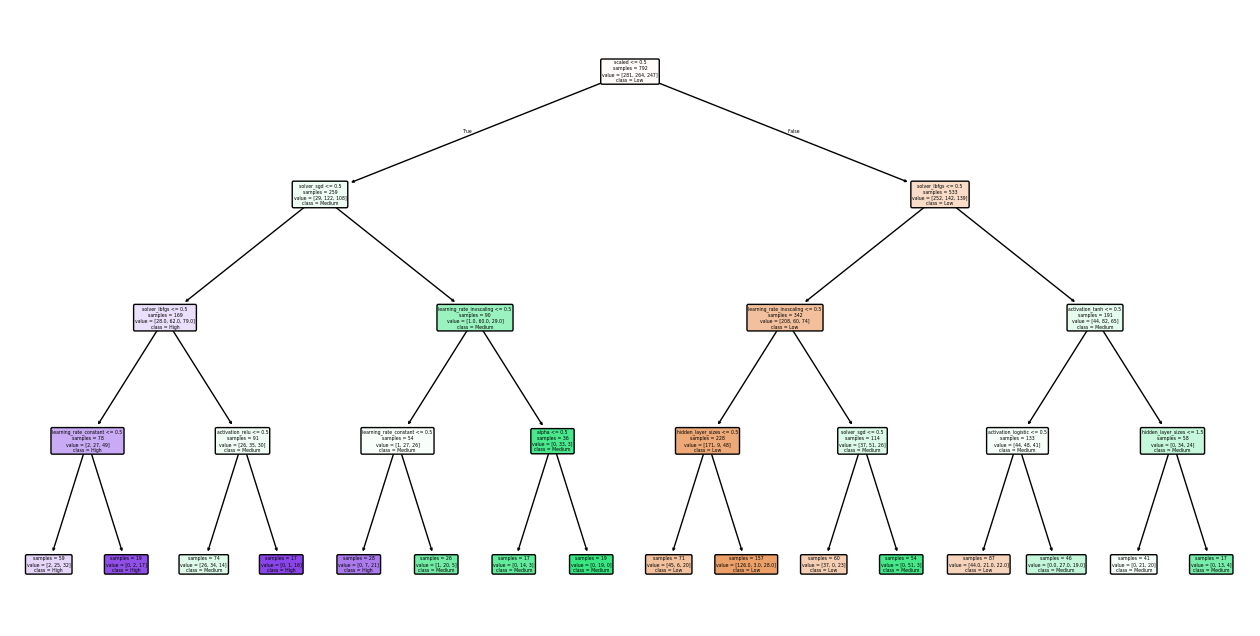

In [ ]:

plt.figure(figsize=(16, 8))
plot_tree(best_model, feature_names= feature_names, class_names=labels, impurity = False, filled=True, rounded=True)
plt.plot()
plt.savefig(r"C:\Users\Rein\downloads\dt.png",  dpi =500)